# Chap-02-Applied

Excercises from Chapter 2 of An Introduction to Statistical Learning with Python by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani, and Jonathan Taylor.

## reference：
1. https://github.com/a-martyn/ISL-python
2. https://www.statlearning.com/

## Import packages

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question-08
This exercise relates to the `College` data set, which can be found in
the file `College.csv`. It contains a number of
variables for 777 diferent universities and colleges in the US.

**(a)** Use the `pd.read_csv()` function to read the data into `Python`. Call the loaded data `college`. Make sure that you have the directory set to the correct location for the data.

In [39]:
college = pd.read_csv('Datasets/College.csv')

**(b)** Look at the data used in the notebook by creating and running a new cell with just the code `college` in it. You should notice that the frst column is just the name of each university in a column named something like `Unnamed`: 0. We don’t really want `pandas` to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:

In [40]:
# 读取 'College.csv' 文件，将第一列（索引为 0）设为索引列
# 这意味着第一列的内容将被用作 DataFrame 的行索引
college2 = pd.read_csv('Datasets/College.csv', index_col=0)

# 将第一列重命名为 'College'
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)

# 将 'College' 列设为索引
college3 = college3.set_index('College')

This has used the frst column in the fle as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the frst data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a *dictionary*, which is specifed by `(key, value)` pairs. Keep your modifed version of the data with the following:


In [41]:
college = college3
college.head() # Display the first 5 rows of the data frame

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**(c)** Use the `describe()` method of to produce a numerical summary of the variables in the data set.

In [42]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**(d)** Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns `[Top10perc, Apps, Enroll]`. Recall that you can reference a list `C` of columns of a data frame `A` using `A[C]`.

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

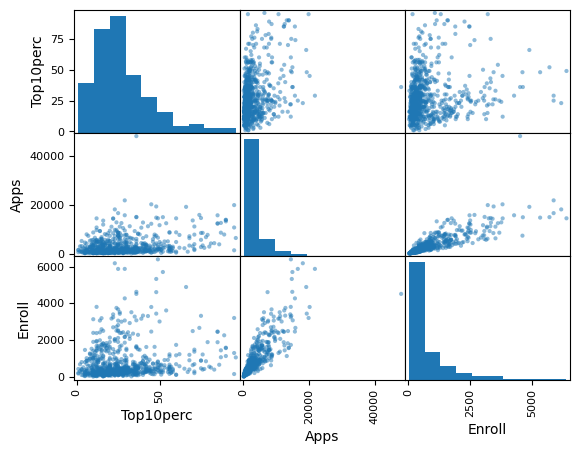

In [43]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])
# 在 jupyter Notebook 或 某些 IDE: 图形通常会自动显示，无需调用 plt.show()。
# 在脚本文件: 图形不会自动显示，需要调用 plt.show() 来手动显示图形。

**(e)** Use the `boxplot()` method of `college` to produce side-by-side boxplots of `Outstate` versus `Private`.


<Axes: title={'center': 'Outstate'}, xlabel='Private'>

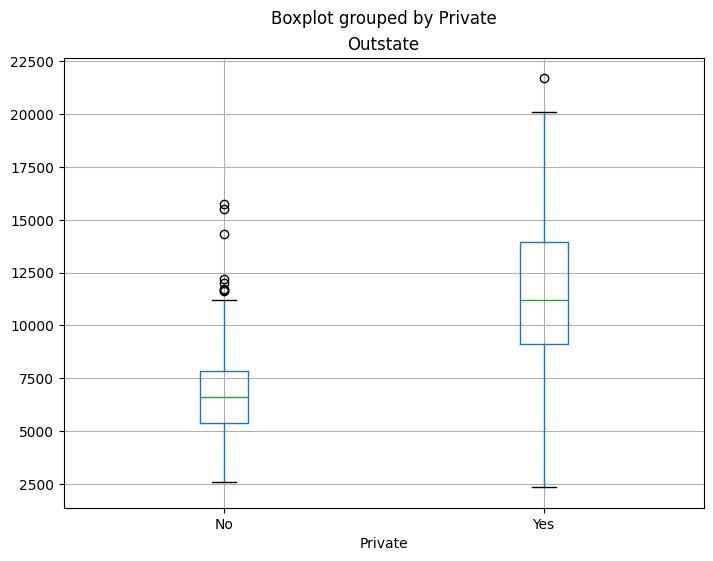

In [44]:
college.boxplot(column='Outstate', by='Private', figsize=(8, 6))

**(f)**  Create a new qualitative variable, called `Elite`, by binning the `Top10perc` variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

In [45]:
college['Elite'] = pd.cut(college['Top10perc'], [0,50,100], labels=['No', 'Yes'])

Use the value_counts() method of college['Elite'] to see how many elite universities there are. 

In [46]:
elite_counts = college['Elite'].value_counts()
print(elite_counts)

Elite
No     699
Yes     78
Name: count, dtype: int64


Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite.

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

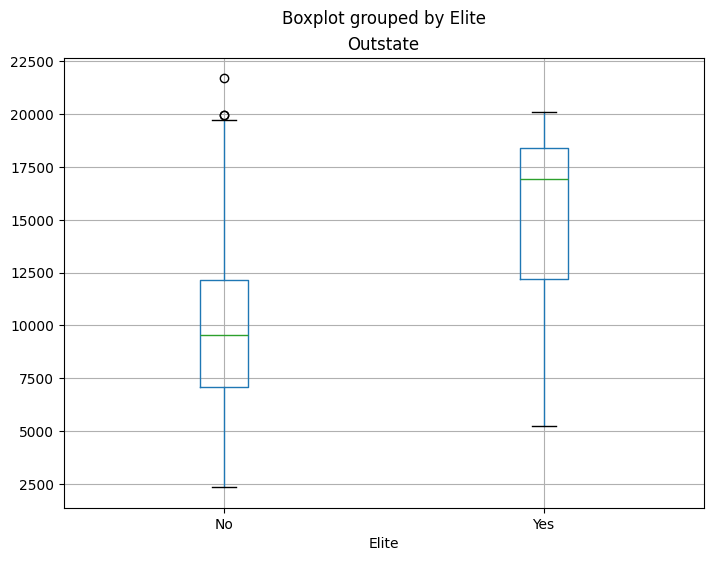

In [47]:
college.boxplot(column='Outstate', by='Elite', figsize=(8, 6))

**(g)** Use the `plot.hist()` method of `college` to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

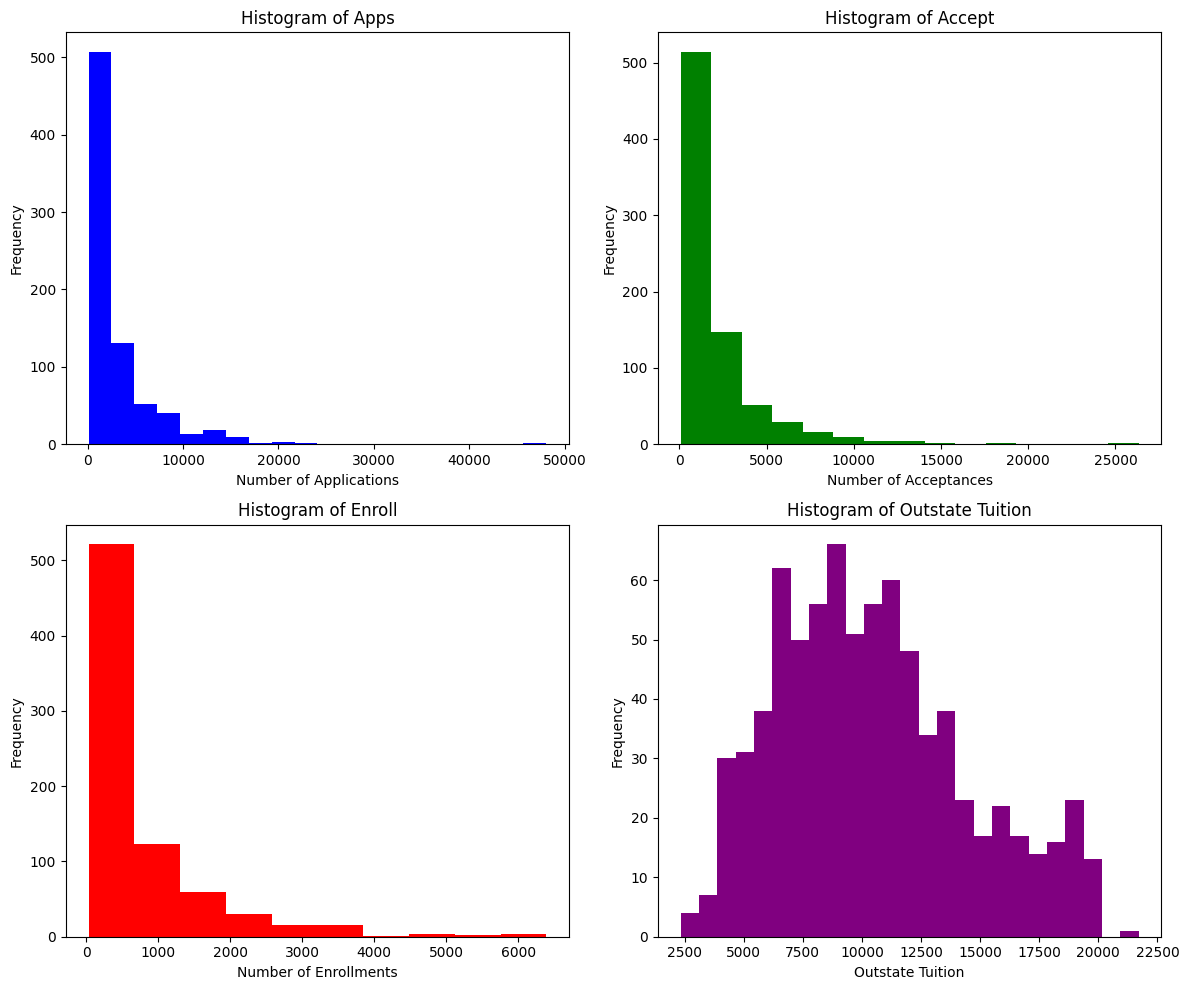

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10)) # 创建一个 2x2 的子图布局

# 绘制第一个子图
college['Apps'].plot.hist(ax=axs[0, 0], bins=20, color='blue')
axs[0, 0].set_title('Histogram of Apps')
axs[0, 0].set_xlabel('Number of Applications')
axs[0, 0].set_ylabel('Frequency')

# 第二张子图 - 'Accept' 变量
college['Accept'].plot.hist(ax=axs[0, 1], bins=15, color='green')
axs[0, 1].set_title('Histogram of Accept')
axs[0, 1].set_xlabel('Number of Acceptances')
axs[0, 1].set_ylabel('Frequency')

# 第三张子图 - 'Enroll' 变量
college['Enroll'].plot.hist(ax=axs[1, 0], bins=10, color='red')
axs[1, 0].set_title('Histogram of Enroll')
axs[1, 0].set_xlabel('Number of Enrollments')
axs[1, 0].set_ylabel('Frequency')

# 第四张子图 - 'Outstate' 变量
college['Outstate'].plot.hist(ax=axs[1, 1], bins=25, color='purple')
axs[1, 1].set_title('Histogram of Outstate Tuition')
axs[1, 1].set_xlabel('Outstate Tuition')
axs[1, 1].set_ylabel('Frequency')

# 调整布局，确保子图不重叠
plt.tight_layout()

# 显示图形
plt.show()



**(h)**  Continue exploring the data, and provide a brief summary of what you discover.


# Question-09
This exercise involves the `Auto` data set studied in the lab. Make sure that the missing values have been removed from the data.

In [49]:
auto = pd.read_csv('Datasets/Auto.csv') # read the dataset Auto.csv
print(auto.isnull().sum()) # check for missing values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [50]:
auto = auto.dropna() # remove missing values
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**(a)** Which of the predictors are quantitative, and which are qualitative?

|Preictors|Type|Description|
|---|---|---|
|MPG|Quantitative|Miles per gallon|
|Cylinders|Qualitative|Number of cylinders|
|Displacement|Quantitative|Engine displacement in liters|
|Horsepower|Quantitative|Horsepower|
|Weight|Quantitative|Vehicle weight in pounds|
|Acceleration|Quantitative|Vehicle acceleration in miles per hour per second|
|Year|Quantitative|Model year|
|Origin|Qualitative|Origin of the vehicle|
|Name|Qualitative|Name of the vehicle|

In [51]:
# 定量变量列表
quantitative_vars = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
# 提取定量变量的数据子集
quantitative_data = auto[quantitative_vars]

In [52]:
# 查看数据集的每列数据类型
print(quantitative_data.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
dtype: object


In [53]:
# 尝试将所有列转换为数值类型，无法转换的字符将被转为 NaN
quantitative_data = quantitative_data.apply(pd.to_numeric, errors='coerce')
# 查看数据集的每列数据类型
print(quantitative_data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
dtype: object


**(b)** What is the range of each quantitative predictor? You can answer this using the `min()` and `max()` methods in `numpy`.

In [54]:
# 计算统计信息
stats = pd.DataFrame({
    'Range': quantitative_data.max() - quantitative_data.min(),
})

# 打印统计信息表格
print(stats)


               Range
mpg             37.6
cylinders        5.0
displacement   387.0
horsepower     184.0
weight        3527.0
acceleration    16.8
year            12.0


**(c)** What is the mean and standard deviation of each quantitative predictor?

In [55]:
# 计算统计信息
stats = pd.DataFrame({
    'Mean': quantitative_data.mean(),
    'Standard Deviation': quantitative_data.std()
})

# 打印统计信息表格
print(stats)

                     Mean  Standard Deviation
mpg             23.515869            7.825804
cylinders        5.458438            1.701577
displacement   193.532746          104.379583
horsepower     104.469388           38.491160
weight        2970.261965          847.904119
acceleration    15.555668            2.749995
year            75.994962            3.690005


**(d)** Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [56]:
# 删除第10到第85条观察记录（索引从0开始，所以实际删除的是索引为9到84的行）
auto_subset = auto.drop(range(9, 85))
auto_subset_data = auto_subset[quantitative_vars]

# 尝试将所有列转换为数值类型，无法转换的字符将被转为 NaN
auto_subset_data = auto_subset_data.apply(pd.to_numeric, errors='coerce')

# 创建一个包含范围、均值和标准差的 DataFrame
stats_sub = pd.DataFrame({
    'Range': auto_subset_data[quantitative_vars].max() - auto_subset_data[quantitative_vars].min(),
    'Mean': auto_subset_data[quantitative_vars].mean(),
    'Standard Deviation': auto_subset_data[quantitative_vars].std()
})

# 打印统计信息表格
print(stats_sub)

               Range         Mean  Standard Deviation
mpg             35.6    24.438629            7.908184
cylinders        5.0     5.370717            1.653486
displacement   387.0   187.049844           99.635385
horsepower     184.0   100.955836           35.895567
weight        3348.0  2933.962617          810.642938
acceleration    16.3    15.723053            2.680514
year            12.0    77.152648            3.111230


**(e)**  Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your fndings.

通过绘制变量之间的散点图来探讨变量间的关系

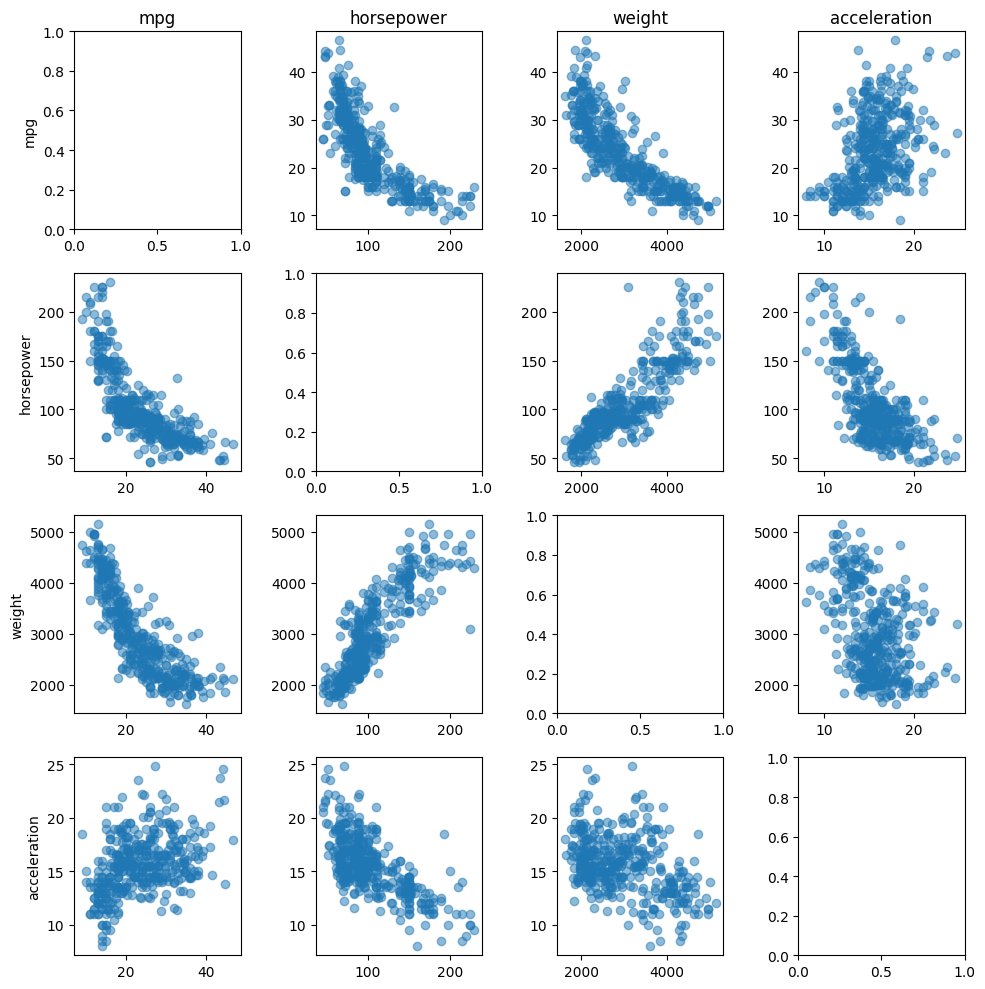

In [69]:
# 选择少量变量进行散点图矩阵绘制
selected_vars = ['mpg', 'horsepower', 'weight', 'acceleration']  # 示例变量

# 绘制散点图矩阵
num_vars = len(selected_vars)
fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(10, 10))

for i in range(num_vars):
    for j in range(num_vars):
        if i != j:
            axes[i, j].scatter(quantitative_data[selected_vars[j]], quantitative_data[selected_vars[i]], alpha=0.5)
        if i == 0:
            axes[i, j].set_title(selected_vars[j])
        if j == 0:
            axes[i, j].set_ylabel(selected_vars[i])

plt.tight_layout()
plt.show()


通过绘制变量间的直方图来探讨变量间的关系

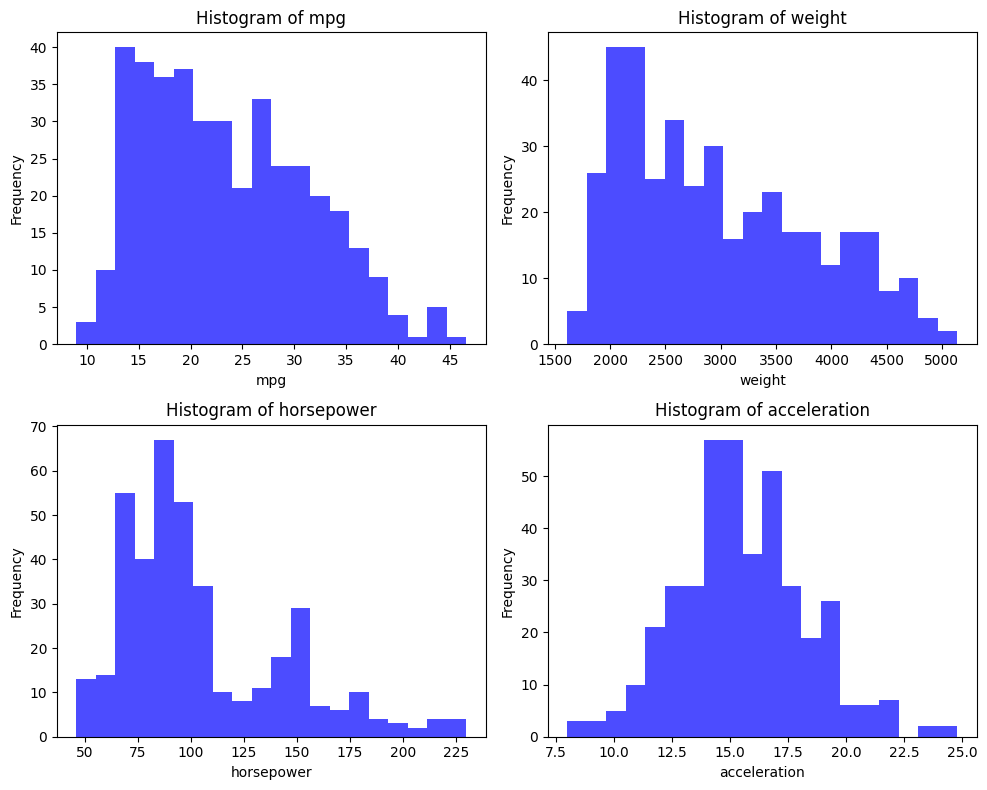

In [71]:
# 选择少量变量进行直方图矩阵绘制，假设这四个变量是 'mpg', 'weight', 'horsepower', 'acceleration'
selected_vars = ['mpg', 'weight', 'horsepower', 'acceleration']

# 创建 2x2 的子图
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 循环遍历每个变量并绘制直方图
for i, var in enumerate(selected_vars):
    row = i // 2  # 行索引
    col = i % 2   # 列索引
    axs[row, col].hist(quantitative_data[var], bins=20, color='blue', alpha=0.7)
    axs[row, col].set_title(f'Histogram of {var}')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Frequency')
    
# 调整布局
plt.tight_layout()
plt.show()


**(f)** Suppose that we wish to predict gas mileage (`mpg`) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting `mpg`? Justify your answer.

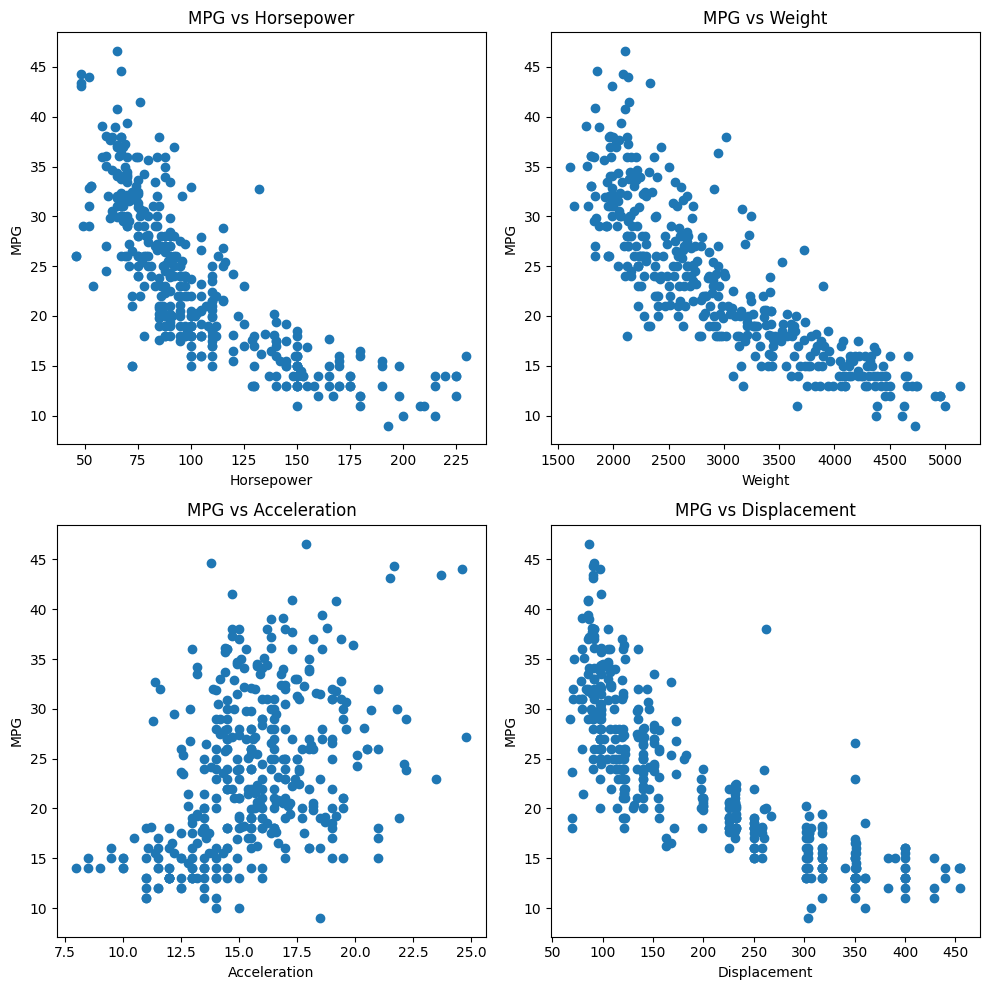

In [74]:
# 设置图像的大小
plt.figure(figsize=(10, 10))

# mpg vs horsepower
plt.subplot(2, 2, 1)
plt.scatter(quantitative_data['horsepower'], quantitative_data['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')

# mpg vs weight
plt.subplot(2, 2, 2)
plt.scatter(quantitative_data['weight'], quantitative_data['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight')

# mpg vs acceleration
plt.subplot(2, 2, 3)
plt.scatter(quantitative_data['acceleration'], quantitative_data['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.title('MPG vs Acceleration')

# mpg vs displacement
plt.subplot(2, 2, 4)
plt.scatter(quantitative_data['displacement'], quantitative_data['mpg'])
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title('MPG vs Displacement')

plt.tight_layout()
plt.show()



# Question-10
 This exercise involves the `Boston` housing data set.

**(a)** To begin, load in the `Boston` data set。

In [75]:
# 加载数据集
boston = pd.read_csv('Datasets/boston.csv')

**(b)** How many rows are in this data set? How many columns? What do the rows and columns represent?

In [76]:
# 查看数据的前几行
print(boston.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


- Rows: Each row represents an observation of a specific residential area.
- Columns: Each column represents a specific attribute or feature of that residential area, such as crime rate, average number of rooms, housing price, etc.

| **Column Name** | **Description**                                          |
|-----------------|----------------------------------------------------------|
| **crim**        | Per capita crime rate by town                           |
| **zn**          | Proportion of residential land zoned for lots over 25,000 square feet |
| **indus**       | Proportion of non-retail business acres per town         |
| **chas**        | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| **nox**         | Nitric oxides concentration (parts per 10 million)       |
| **rm**          | Average number of rooms per dwelling                     |
| **age**         | Proportion of owner-occupied units built prior to 1940   |
| **dis**         | Weighted distances to five Boston employment centers      |
| **rad**         | Accessibility to radial highways                         |
| **tax**         | Full-value property tax rate per $10,000                  |
| **ptratio**     | Pupil-teacher ratio by town                              |
| **lstat**       | Percentage of the population that is lower status         |
| **medv**        | Median value of owner-occupied homes (in thousands of dollars) |


In [59]:
# 查看数据集的行数和列数
rows, cols = boston.shape
print(f"数据集中有 {rows} 行和 {cols} 列。")

数据集中有 506 行和 14 列。


**(c)** Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your fndings.

**(d)** Are any of the predictors associated with per capita crime rate? If so, explain the relationship.


**(e)** Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

**(f)** How many of the suburbs in this data set bound the Charles river?

**(g)** What is the median pupil-teacher ratio among the towns in this data set?

**(h)** Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your fndings.

**(i)** In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.
